In [ ]:
markdown
##data cleaning

In [2]:
import pandas as pd  
df = pd.read_csv("CarPrice_Assignment.csv")  
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1]:
import pandas as pd

df = pd.read_csv("CarPrice_Assignment.csv")

print("Columns in dataset:", df.columns)

columns_to_drop = ['column_name1', 'column_name2']  # Change to real column names

df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100

null_info = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentage})
print(null_info)


Columns in dataset: Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
                  Null Count  Null Percentage
car_ID                     0              0.0
symboling                  0              0.0
CarName                    0              0.0
fueltype                   0              0.0
aspiration                 0              0.0
doornumber                 0              0.0
carbody                    0              0.0
drivewheel                 0              0.0
enginelocation             0              0.0
wheelbase                  0              0.0
carlength                  0              0.0
carwidth           

In [4]:
print(df.columns)


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [3]:
df.drop(columns=['car_ID', 'symboling', 'highwaympg'], inplace=True)  


In [4]:
print(df.columns)

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'price'],
      dtype='object')


In [5]:
df = df.sort_values(by='price', ascending=False)


In [6]:
print(df.columns)

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'price'],
      dtype='object')


In [ ]:
markdown
##data visualization

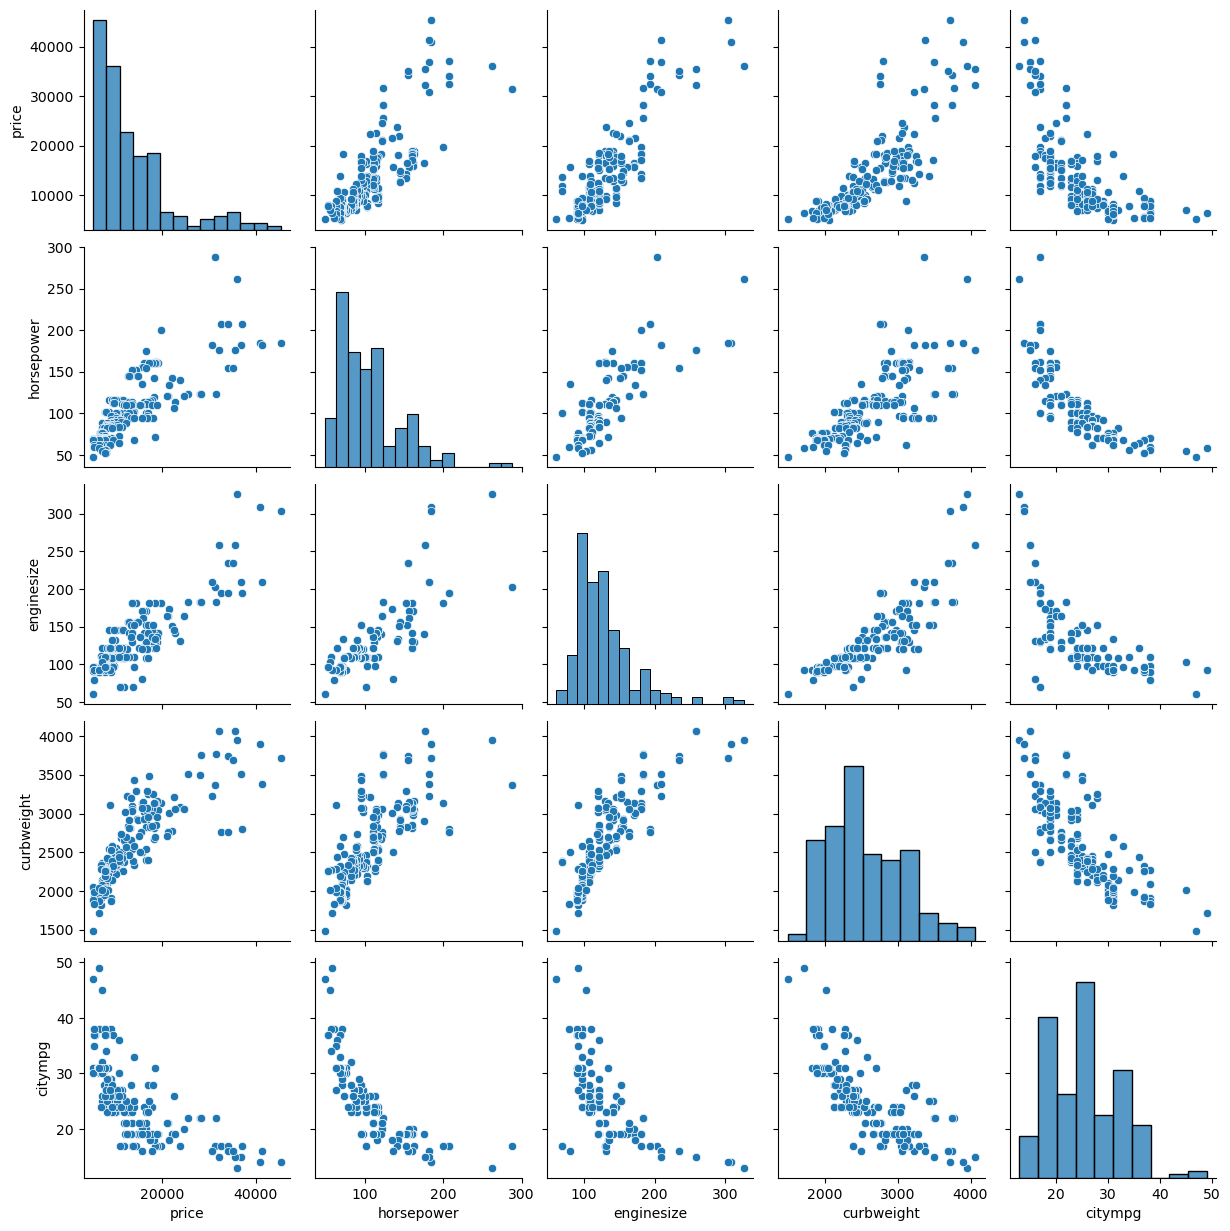

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to analyze relationships between key features and price
sns.pairplot(df, vars=['price', 'horsepower', 'enginesize', 'curbweight', 'citympg'])
plt.show()


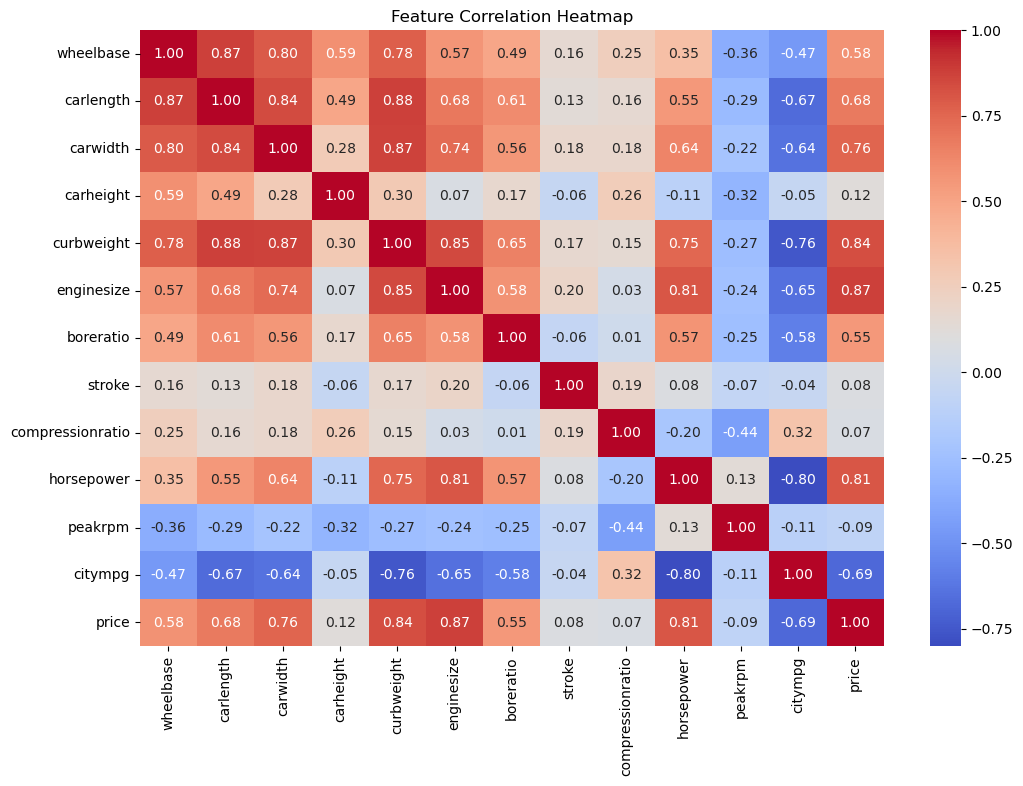

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
markdown
##data preparation

In [14]:
import pandas as pd  

# Load dataset  
file_path = r"C:\Users\nabad\Documents\Car_Price_Analysis\CarPrice_Assignment.csv"  
df = pd.read_csv(file_path)  

# 1. Splitting 'CarName' into 'carCompany'  
df['carCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())  

# 2. Correct spelling issues in 'carCompany'  
df['carCompany'] = df['carCompany'].replace({'maxda': 'mazda', 'porcshce': 'porsche',  
                                             'toyouta': 'toyota', 'vokswagen': 'volkswagen',  
                                             'vw': 'volkswagen'})  

# 3. Drop 'car_ID' since it is just a serial number  
df.drop(columns=['car_ID'], inplace=True)  

# 4. Convert categorical variables into quantitative values using dummy variables  
df = pd.get_dummies(df, drop_first=True)  

# 5. Rename dummy variable columns for clarity  
df.columns = df.columns.str.replace(' ', '_')  

# 6. Create a new derived column 'car_stability'  
df['car_stability'] = df['wheelbase'] / df['carlength']  

# 7. Drop highly correlated independent variables (from heatmap analysis)  
highly_correlated = ['carlength', 'curbweight', 'enginesize']  # Example list, modify based on your heatmap  
df.drop(columns=highly_correlated, inplace=True)  

# Display first few rows after processing  
print(df.head())  


   symboling  wheelbase  carwidth  carheight  boreratio  stroke  \
0          3       88.6      64.1       48.8       3.47    2.68   
1          3       88.6      64.1       48.8       3.47    2.68   
2          1       94.5      65.5       52.4       2.68    3.47   
3          2       99.8      66.2       54.3       3.19    3.40   
4          2       99.4      66.4       54.3       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  ...  carCompany_peugeot  \
0               9.0         111     5000       21  ...               False   
1               9.0         111     5000       21  ...               False   
2               9.0         154     5000       19  ...               False   
3              10.0         102     5500       24  ...               False   
4               8.0         115     5500       18  ...               False   

   carCompany_plymouth  carCompany_porsche  carCompany_renault  \
0                False               False               False

In [ ]:
markdown 
##features direct co-relation value

In [16]:
import pandas as pd  

# Load dataset  
file_path = r"C:\Users\nabad\Documents\Car_Price_Analysis\CarPrice_Assignment.csv"  
df = pd.read_csv(file_path)  

# 1. Splitting 'CarName' into 'carCompany'  
df['carCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())  

# 2. Correct spelling issues in 'carCompany'  
df['carCompany'] = df['carCompany'].replace({'maxda': 'mazda', 'porcshce': 'porsche',  
                                             'toyouta': 'toyota', 'vokswagen': 'volkswagen',  
                                             'vw': 'volkswagen'})  

# 3. Drop 'car_ID' since it is just a serial number  
df.drop(columns=['car_ID'], inplace=True)  

# 4. Convert categorical variables into quantitative values using dummy variables  
df = pd.get_dummies(df, drop_first=True)  

# 5. Rename dummy variable columns for clarity  
df.columns = df.columns.str.replace(' ', '_')  

# 6. Create a new derived column 'car_stability'  
df['car_stability'] = df['wheelbase'] / df['carlength']  

# 7. Drop highly correlated independent variables (from heatmap analysis)  
columns_to_drop = [col for col in ['carlength', 'carwidth', 'curbweight', 'highwaympg', 'car_stability'] if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)

# Display dropped columns and updated DataFrame
print("Dropped columns:", columns_to_drop)
print(df.head())

Dropped columns: ['carlength', 'carwidth', 'curbweight', 'highwaympg', 'car_stability']
   symboling  wheelbase  carheight  enginesize  boreratio  stroke  \
0          3       88.6       48.8         130       3.47    2.68   
1          3       88.6       48.8         130       3.47    2.68   
2          1       94.5       52.4         152       2.68    3.47   
3          2       99.8       54.3         109       3.19    3.40   
4          2       99.4       54.3         136       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  ...  carCompany_nissan  \
0               9.0         111     5000       21  ...              False   
1               9.0         111     5000       21  ...              False   
2               9.0         154     5000       19  ...              False   
3              10.0         102     5500       24  ...              False   
4               8.0         115     5500       18  ...              False   

   carCompany_peugeot  carCompany_

In [ ]:
markdown
##data analysis

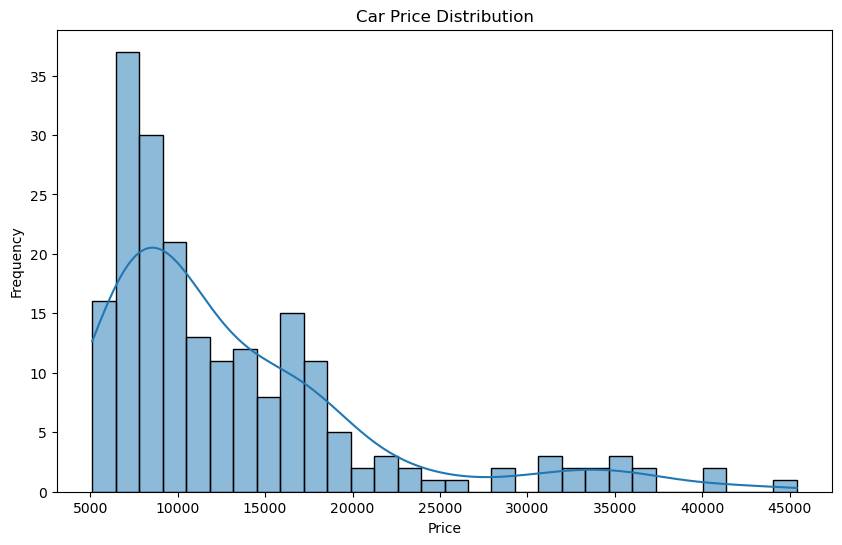

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Car Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

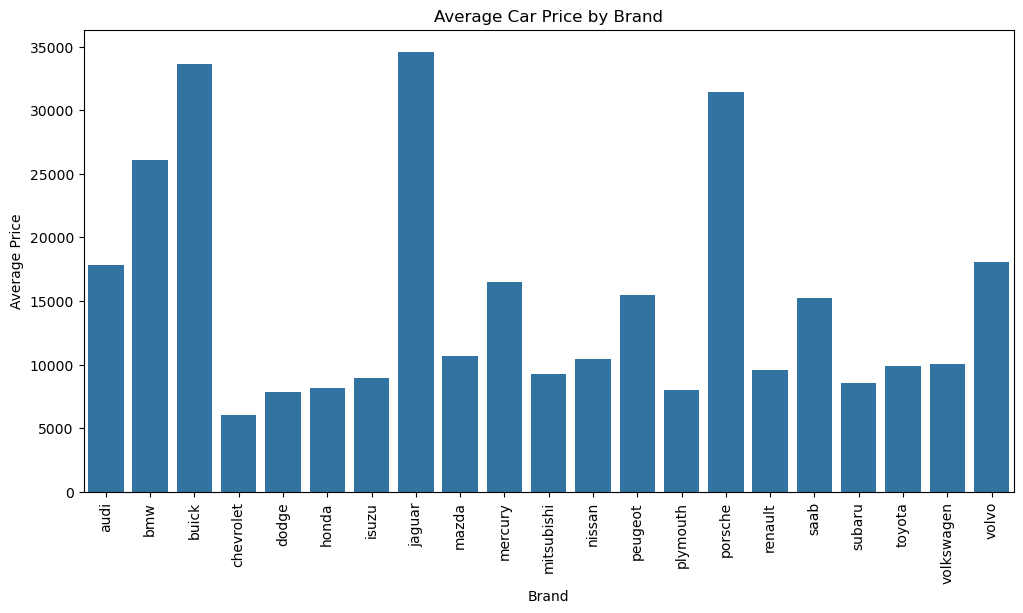

In [19]:
# Extract brand names from one-hot encoded columns
car_brands = [col.replace("carCompany_", "") for col in df.columns if col.startswith("carCompany_")]

# Compute average price for each brand
avg_prices = {brand: df[df[f"carCompany_{brand}"] == 1]["price"].mean() for brand in car_brands}

# Convert to DataFrame
brand_df = pd.DataFrame(list(avg_prices.items()), columns=["Brand", "Average Price"])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Brand", y="Average Price", data=brand_df)
plt.xticks(rotation=90)
plt.title("Average Car Price by Brand")
plt.show()


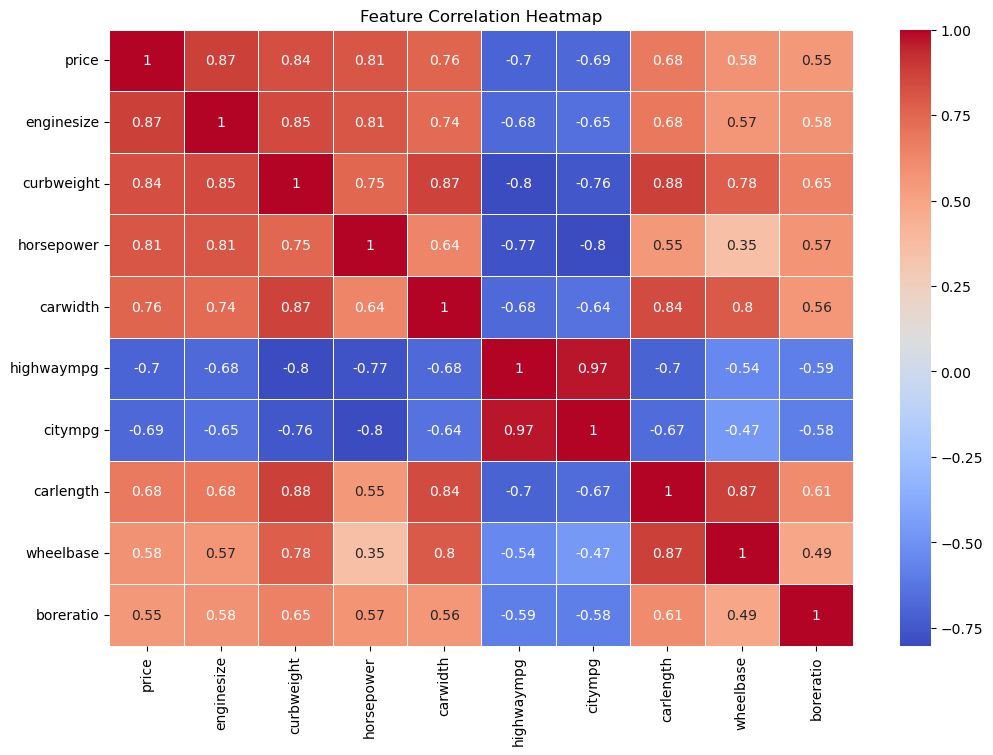

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"C:\Users\nabad\Documents\Car_Price_Analysis\CarPrice_Assignment.csv"
df = pd.read_csv(file_path)

df_numeric = df.select_dtypes(include=["number"])  # Select only numeric columns

correlation_matrix = df_numeric.corr()

if "price" in df_numeric.columns:
    top_features = correlation_matrix["price"].abs().sort_values(ascending=False).index[:10]
    correlation_matrix = df_numeric[top_features].corr()

plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.xticks(rotation=90)  
plt.yticks(rotation=0) 
plt.title("Feature Correlation Heatmap")

plt.show()


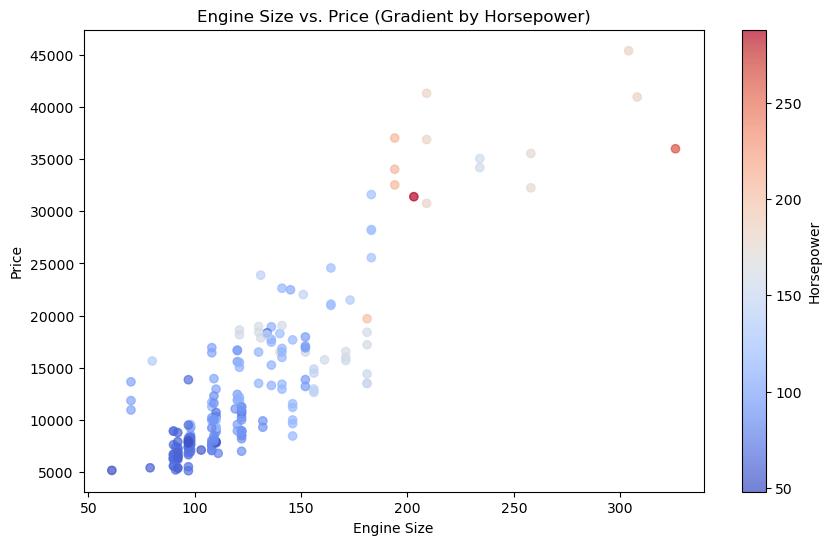

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\nabad\Documents\Car_Price_Analysis\CarPrice_Assignment.csv"
df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["enginesize"], df["price"], c=df["horsepower"], cmap="coolwarm", alpha=0.7)

cbar = plt.colorbar(scatter)
cbar.set_label("Horsepower")

plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs. Price (Gradient by Horsepower)")

plt.show()
